# Q-diamond plot

#### --- qiskit integration ---

(authored by JK, AC Sep 28th, 2025)

This plotting routinge displays a n-qubit quantum state as a Hasse-type diagram with embedded probabilities. This is useful to debug algorithmic snippets of quantum circuits analytically.

In [40]:
import qmond_lib as qd
import matplotlib.pyplot as plt
%matplotlib inline

##### Conversion routing follows in the next cell. Note that this should ideally be in the Python library as already prepared, yet something's wrong with the Python environment at this point in time.

In [41]:
import numpy as np
from typing import Dict, Tuple, Iterable, Union

def probs_dict_to_subset_dict(probs_dict: Dict[str, float]) -> Dict[Tuple[int, ...], float]:
    """
    Convert Qiskit's probabilities_dict (bitstring keys) to a subset→value dict.

    Example: {"00": 0.5, "11": 0.5}  →  {(): 0.5, (0,1): 0.5}
    """
    out = {}
    for bitstring, p in probs_dict.items():
        n = len(bitstring)
        # Reverse order: bitstring[-1] = qubit 0, bitstring[-2] = qubit 1, etc.
        subset = tuple(i for i, bit in enumerate(reversed(bitstring)) if bit == "1")
        out[subset] = p
    return out

Subset = Tuple[int, ...]
AmpDict = Dict[Subset, complex]

def statevector_to_subset_dict(state: Union["Statevector", np.ndarray, Iterable[complex]],
                               eps: float = 0.0) -> AmpDict:
    """
    Convert a Qiskit Statevector (or 1D complex iterable) into a dict that maps
    'subset of qubit indices that are 1' -> complex amplitude.

    - Bit convention: bit j corresponds to qubit j (qubit 0 is least significant).
    - If eps > 0, amplitudes with |a| <= eps are dropped.
    """
    # Extract flat complex array
    if isinstance(state, Statevector):
        vec = np.asarray(state.data, dtype=complex)
        n = int(round(np.log2(vec.size)))
    else:
        vec = np.asarray(state, dtype=complex).ravel()
        n = int(round(np.log2(vec.size)))

    if vec.size != (1 << n):
        raise ValueError("Input length is not a power of two; expected a qubit statevector.")

    out: AmpDict = {}
    for i, a in enumerate(vec):
        if abs(a) <= eps:
            continue
        # subset = indices of qubits that are 1 in the basis state |b_{n-1} ... b_1 b_0>
        subset = tuple(j for j in range(n) if (i >> j) & 1)
        out[subset] = a
    return out

#### Integration with QisKit

(<Figure size 1200x1200 with 12 Axes>, <Axes: title={'center': 'imag final'}>)

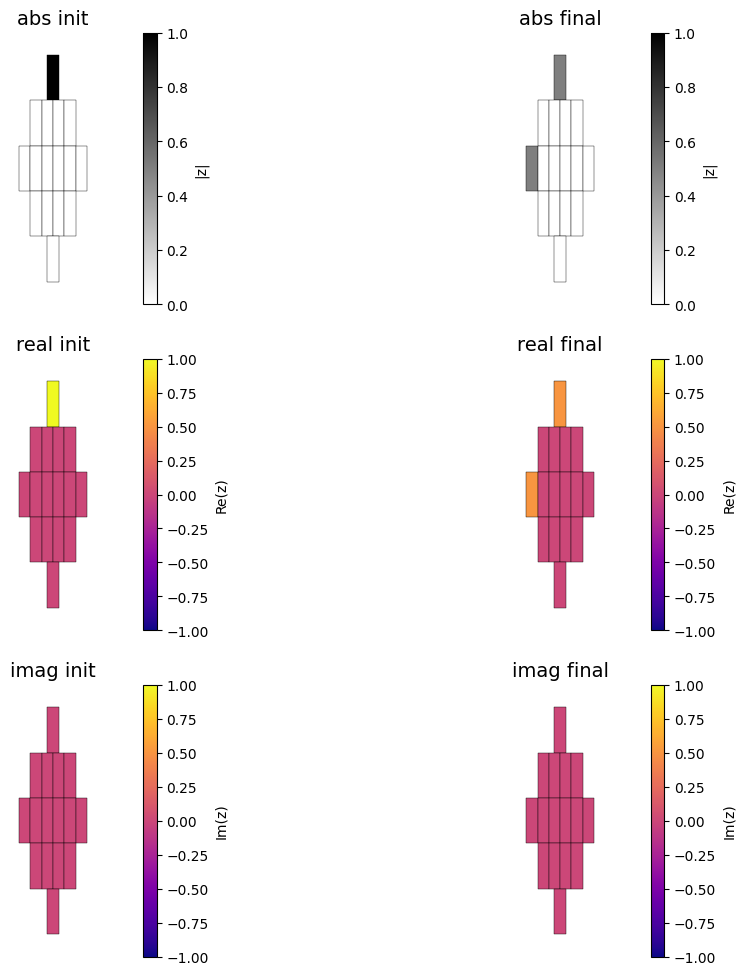

In [43]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

number_of_qubits = 4
h_spacing = 0.5
v_spacing = 2.0
size = [h_spacing, v_spacing]

qc = QuantumCircuit(number_of_qubits)

#save initial state
ic = Statevector.from_instruction(qc)
prob_dict_ic = statevector_to_subset_dict(ic) 

# Build Bell state
qc.h(0)
qc.cx(0, 1)

#save final state
fc = Statevector.from_instruction(qc)
prob_dict_fc = statevector_to_subset_dict(fc)   

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

comp = "abs"

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_ic,
    prob_component = comp,
    fig=fig, ax=axes[0,0],
    title = "abs init",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_fc,
    prob_component = comp,
    fig=fig, ax=axes[0,1],
    title = "abs final",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)

comp = "real"

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_ic,
    prob_component = comp,
    fig=fig, ax=axes[1,0],
    title = "real init",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_fc,
    prob_component = comp,
    fig=fig, ax=axes[1,1],
    title = "real final",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)

comp = "imag"

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_ic,
    prob_component = comp,
    fig=fig, ax=axes[2,0],
    title = "imag init",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)

qd.plot_qbit_space(
    n = number_of_qubits,   
    prob = prob_dict_fc,
    prob_component = comp,
    fig=fig, ax=axes[2,1],
    title = "imag final",
    tensor_bs_size = size,
    horizontal_spacing = h_spacing,
    vertical_spacing = v_spacing
)